In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food appliance sports kitchen electronic accessory vehicle outdoor animal furniture indoor person


In [11]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']); #changing the category names doesn't change anything
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [398438])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds)

[{'license': 3, 'file_name': '000000532481.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-20 16:28:24', 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg', 'id': 532481}, {'license': 1, 'file_name': '000000458755.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000458755.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-16 23:06:51', 'flickr_url': 'http://farm6.staticflickr.com/5119/5878453277_eea657a01d_z.jpg', 'id': 458755}, {'license': 1, 'file_name': '000000385029.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000385029.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-21 05:40:19', 'flickr_url': 'http://farm5.staticflickr.com/4061/4670536748_8c7bd89494_z.jpg', 'id': 385029}, {'license': 4, 'file_name': '000000311303.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000311303.jpg', 'height': 427, 'width': 640, 'date_

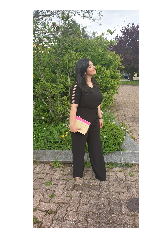

In [6]:
# load and display image
#I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
I = io.imread('../images/test_imgs/image3.jpg') #this doesn't work
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

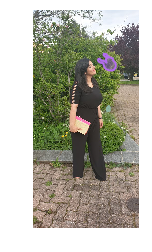

In [9]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = None
for ids in imgIds:
    annIds = coco.getAnnIds(imgIds=ids, catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    if anns is not None:
        break

coco.showAnns(anns)

In [ ]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

In [ ]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [ ]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

In [ ]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()